In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os

combined_path = "../dataset/combined.txt"
images_dir = "../dataset/poodle_images"

entries = []
with open(combined_path, "r") as f:
    for line in f:
        parts = line.strip().split()
        if len(parts) >= 2:
            filename = parts[0]
            try:
                age = int(parts[-1])
                entries.append((filename, age))
            except ValueError:
                pass

# Convert ages to array
ages = np.array([age for _, age in entries])


Q1: 27.0
Q3: 80.0
IQR: 53.0
Lower bound: -52.5
Upper bound: 159.5


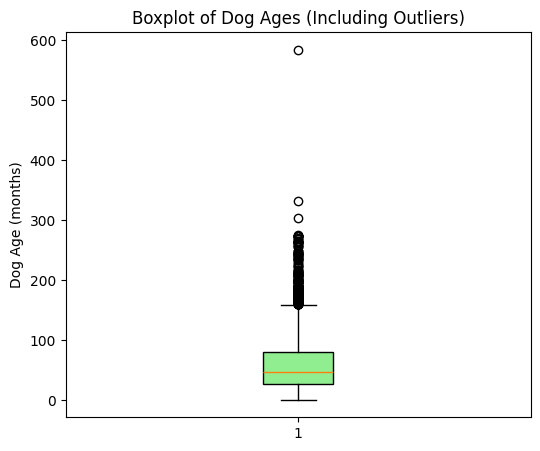

In [5]:


Q1 = np.percentile(ages, 25)
Q3 = np.percentile(ages, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

plt.figure(figsize=(6,5))
plt.boxplot(ages, vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightgreen'))
plt.ylabel("Dog Age (months)")
plt.title("Boxplot of Dog Ages (Including Outliers)")
plt.show()

In [7]:
# remove outliers
cleaned_entries = [(fname, age) for (fname, age) in entries 
                   if lower_bound <= age <= upper_bound]

print(f"Original rows: {len(entries)}")
print(f"Cleaned rows:  {len(cleaned_entries)}")

with open(combined_path, "w") as f:
    for fname, age in cleaned_entries:
        f.write(f"{fname} {age}\n")

print("combined.txt updated.")

valid_filenames = set(fname for fname, _ in cleaned_entries)

deleted_count = 0
kept_count = 0

for img_name in os.listdir(images_dir):
    img_path = os.path.join(images_dir, img_name)
    
    if img_name not in valid_filenames:
        os.remove(img_path)
        deleted_count += 1
    else:
        kept_count += 1

Original rows: 23000
Cleaned rows:  22650
combined.txt updated.


In [8]:
valid_filenames = set()

with open(combined_path, "r") as f:
    for line in f:
        parts = line.strip().split()
        if len(parts) >= 1:
            valid_filenames.add(parts[0])   

print(f"Loaded {len(valid_filenames)} filenames from combined.txt")

for img_name in os.listdir(images_dir):
    full_path = os.path.join(images_dir, img_name)

    if img_name not in valid_filenames:
        print(f"MISSING: {img_name}")


Loaded 22646 filenames from combined.txt


In [9]:
valid_filenames = set()

# Load all filenames listed in combined.txt
with open(combined_path, "r") as f:
    for line in f:
        parts = line.strip().split()
        if len(parts) >= 1:
            valid_filenames.add(parts[0])

print(f"Loaded {len(valid_filenames)} filenames from combined.txt")

# Check which images from the directory ARE in combined.txt
for img_name in os.listdir(images_dir):
    full_path = os.path.join(images_dir, img_name)

    if img_name in valid_filenames:
        print(f"FOUND: {img_name}")

Loaded 22646 filenames from combined.txt
FOUND: 0rDoiEPPSFGdqf-Ujd7vtwAAACMAARAD.jpg
FOUND: 17B1o7cWTjyaf2jgMpoGvQAAACMAARAD.jpg
FOUND: 23X3CsZYRQqWOxF4WaDbxAAAACMAARAD.jpg
FOUND: 3052ac86257e408a9d03cb9c8413ace0.jpg
FOUND: 4nn65kanT-q68FQ3osTL8QAAACMAARAD.jpg
FOUND: 5ea58f5570ee46bca6b6befc6557a9ee.jpg
FOUND: 60ab8031a0e74f03b84cc6efbd887b9b.jpg
FOUND: 6bd66fdd5b974cf1b04573ad68c02bfe.jpg
FOUND: 7939270f935541b3bc219684e177b7cb.jpg
FOUND: 7a9f106371ad435ea714b4c7949c6be6.jpg
FOUND: a4eb6497ece744fca376f807a678ff3a.jpg
FOUND: aab548eb024a47459e42c83f308673e6.jpg
FOUND: ANcZ3B4kRrO5EuLJdKrkqwAAACMAARAD.jpg
FOUND: A_---hRJkTXUAAAAAAAAAAAAAAAQAAAQ.jpg
FOUND: A_--S3QaAlkfgAAAAAAAAAAAAAAQAAAQ.jpg
FOUND: A_-0kORadj2Q3SNW9NmpX4LwAAAQAAAQ.jpg
FOUND: A_-0qaQYvQKXkAAAAAAAAAAAAAAQAAAQ.jpg
FOUND: A_-0RRQIZ8oFsAAAAAAAAAAAAAAQAAAQ.jpg
FOUND: A_-13TRqxwW74AAAAAAAAAAAAAAQAAAQ.jpg
FOUND: A_-1lvT4qHcFwAAAAAAAAAAAAAAQAAAQ.jpg
FOUND: A_-1UjR5vPq7EAAAAAAAAAAAAAAQAAAQ.jpg
FOUND: A_-1vwQrgZenOdJ4JLlewwngAAAQ

In [14]:

# paths
combined_path = r"C:\Users\maryl\Downloads\-Poodle-FADING-\dataset\combined.txt"
images_dir = r"C:\Users\maryl\Downloads\-Poodle-FADING-\dataset\poodle_images"

# All image files in directory
existing_images = set(os.listdir(images_dir))

kept_lines = []
removed_count = 0

with open(combined_path, "r") as f:
    for line in f:
        parts = line.strip().split()

        if not parts:
            continue
        
        filename = parts[0]   # ONLY the first token is the filename

        if filename in existing_images:
            kept_lines.append(line)
        else:
            print(f"REMOVED (missing file): {filename}")
            removed_count += 1

# Write back only valid lines
with open(combined_path, "w") as f:
    f.writelines(kept_lines)

print(f"\nFinished.")
print(f"Lines removed: {removed_count}")
print(f"Lines kept:    {len(kept_lines)}")

REMOVED (missing file): A_ZtPmS56-SJ4AAAAAAAAAAAAAAQAAAQ.jpg
REMOVED (missing file): A_OlY6Rqf3OKKvwTVKmt1I7wAAAQAAAQ.jpg
REMOVED (missing file): A_OvsnQaSM_hAAAAAAAAAAAAAAAQAAAQ.jpg
REMOVED (missing file): A_5i1ETYSgRFAAAAAAAAAAAAAAAQAAAQ.jpg
REMOVED (missing file): A_uQFoS7tKqPIAAAAAAAAAAAAAAQAAAQ.jpg
REMOVED (missing file): A_GEkBQKohd2wAAAAAAAAAAAAAAQAAAQ.jpg
REMOVED (missing file): A_a8PNSIFXrNkAAAAAAAAAAAAAAQAAAQ.jpg
REMOVED (missing file): A_TLdxR6S3mgcAAAAAAAAAAAAAAQAAAQ.jpg
REMOVED (missing file): A_QyvkSpcERw4AAAAAAAAAAAAAAQAAAQ.jpg
REMOVED (missing file): A_aZy0S4jqDzAAAAAAAAAAAAAAAQAAAQ.jpg
REMOVED (missing file): A_HnO5T7ZnBoMAAAAAAAAAAAAAAQAAAQ.jpg
REMOVED (missing file): A_JQazS45iXLoAAAAAAAAAAAAAAQAAAQ.jpg
REMOVED (missing file): A_TdgzSaGzNzIAAAAAAAAAAAAAAQAAAQ.jpg
REMOVED (missing file): A_SRGsSJDgMsAAAAAAAAAAAAAAAQAAAQ.jpg
REMOVED (missing file): A_CS07ToP4S-UAAAAAAAAAAAAAAQAAAQ.jpg
REMOVED (missing file): A_QIkPS5TkuW4AAAAAAAAAAAAAAQAAAQ.jpg
REMOVED (missing file): 